In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from IPython.display import display

In [29]:
# %run make_pitch_angle_dataframes.py

In [4]:
pa_df = pd.read_pickle('pitch_angle_comparisons.pkl')
sf_df = pd.read_pickle('sparcfire_pitch_angles.pkl')
arm_df = pd.read_pickle('arm_pitch_angles.pkl')

shared_keys = sf_df.index.values[
    np.isin(sf_df.index.values, pa_df.index.values)
]

In [5]:
pa_sf_df = pa_df.loc[shared_keys]
pa_sf_df['SF pitch angle'] = sf_df['pa']
pa_sf_df['SF sigma'] = sf_df['sigma_pa']

print('For a galaxy average')
display(pa_sf_df.head(3))
print('For individual arms:')
display(arm_df.head(3))

For a galaxy average


,Hart pitch angle,GZB pitch angle,GZB sigma,SF pitch angle,SF sigma
20902081,13.843782,6.257303,1.945106,17.100268,9.233085
21096878,18.526741,14.326583,0.522030,20.511005,9.220849
20902064,21.677171,27.968106,0.345265,26.914451,11.459259


For individual arms:


,subject_id,pa,sigma_pa,length,hart_pa
0,21096909,26.903561,1.558496,0.316670,20.066538
1,21096909,14.844489,3.231209,0.654809,20.066538
2,21096909,26.076264,1.709857,0.611535,20.066538


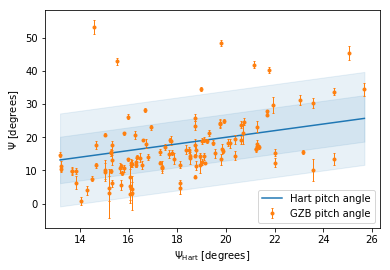

In [6]:
pa_hart = pa_df['Hart pitch angle']
pa_gzb = pa_df['GZB pitch angle']
a = np.argsort(pa_hart)
x = pa_hart.iloc[a]

plt.plot(x, pa_hart.iloc[a])
plt.errorbar(x, pa_gzb.iloc[a], pa_df['GZB sigma'].iloc[a],
             capsize=1, fmt='.', linewidth=1)
plt.fill_between(x, pa_hart.iloc[a] - 14,
                 pa_hart.iloc[a]+14, color='C0', alpha=0.1)

plt.fill_between(x, pa_hart.iloc[a] - 7,
                 pa_hart.iloc[a]+7, color='C0', alpha=0.1)

plt.ylabel('$\Psi$ [degrees]')
plt.xlabel('$\Psi_\mathrm{Hart}$ [degrees]')
plt.legend()
plt.savefig('method-paper-plots/pitch-angle-comparison.pdf', bbox_inches='tight')
plt.savefig('method-paper-plots/pitch-angle-comparison.png', bbox_inches='tight');

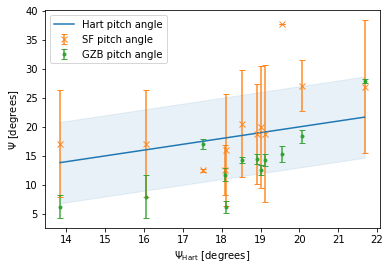

In [7]:
b = np.argsort(pa_sf_df['Hart pitch angle'])
x = pa_sf_df['Hart pitch angle'].iloc[b]

plt.plot(x, pa_sf_df['Hart pitch angle'].iloc[b], c='C0')
plt.fill_between(
    x,
    pa_sf_df['Hart pitch angle'].iloc[b] - 7,
    pa_sf_df['Hart pitch angle'].iloc[b] + 7,
    alpha=0.1, color='C0',
)

plt.errorbar(x, pa_sf_df['SF pitch angle'].iloc[b],
             pa_sf_df['SF sigma'].iloc[b], color='C1', fmt='x',
             capsize=3, alpha=0.9)

plt.errorbar(x, pa_sf_df['GZB pitch angle'].iloc[b],
             pa_sf_df['GZB sigma'].iloc[b], fmt='.', color='C2',
             capsize=3, alpha=0.9)

plt.ylabel('$\Psi$ [degrees]')
plt.xlabel('$\Psi_\mathrm{Hart}$ [degrees]')
plt.legend()
plt.savefig('method-paper-plots/pitch-angle-comparison2.pdf', bbox_inches='tight')
plt.savefig('method-paper-plots/pitch-angle-comparison2.png', bbox_inches='tight')

In [8]:
arm_dispersion_df = pd.concat((
    pa_df['GZB pitch angle'].rename('gzb_pa'),
    arm_df.groupby('subject_id')['pa'].std().rename('sigma_pa'),
    pa_df['Hart pitch angle'].rename('hart_pa'),
), axis=1)
arm_dispersion_df.head(3)

,gzb_pa,sigma_pa,hart_pa
20901990,24.745800,NaN,20.730790
20901993,14.163900,NaN,16.786885
20901995,13.696389,NaN,18.533995


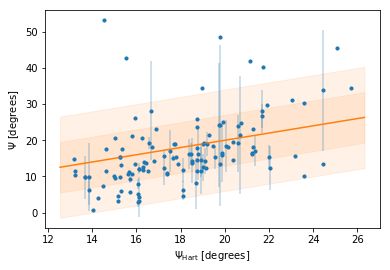

In [27]:
plt.errorbar(arm_dispersion_df['hart_pa'], arm_dispersion_df['gzb_pa'],
             arm_dispersion_df['sigma_pa'], fmt='.', alpha=0.3)

plt.plot(arm_dispersion_df['hart_pa'], arm_dispersion_df['gzb_pa'],
         '.', c='C0')

lims = np.array(plt.gca().get_xlim())
plt.plot(lims, lims)
plt.fill_between(lims, lims-14, lims+14, color='C1', alpha=0.1)
plt.fill_between(lims, lims-7, lims+7, color='C1', alpha=0.1)
plt.ylabel('$\Psi$ [degrees]')
plt.xlabel('$\Psi_\mathrm{Hart}$ [degrees]');
plt.savefig('method-paper-plots/pitch-angle-comparison3.pdf', bbox_inches='tight')
plt.savefig('method-paper-plots/pitch-angle-comparison3.png', bbox_inches='tight');